# Tensorboard

In [10]:
# Imports
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.tensorboard import SummaryWriter

In [11]:
# Define data transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load datasets
trainset = torchvision.datasets.FashionMNIST('./data', download=True, train=True, transform=transform)
testset = torchvision.datasets.FashionMNIST('./data', download=True, train=False, transform=transform)

# Create data loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

In [12]:
# Constant for classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Helper function to show an image
def matplotlib_imshow(img, one_channel=False):
    if one_channel: img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel: plt.imshow(npimg, cmap="Greys")
    else: plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [13]:
# Create model class
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create model object
net = Net()

In [14]:
# Loss criterium
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [15]:
# Default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/fashion_mnist_experiment_1')

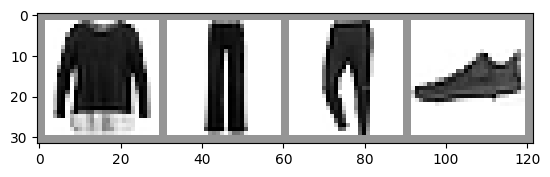

In [17]:
# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Create grid of images
img_grid = torchvision.utils.make_grid(images)

# Show images
matplotlib_imshow(img_grid, one_channel=True)

# Write to tensorboard
writer.add_image('four_fashion_mnist_images', img_grid)
writer.add_graph(net, images)
writer.close()
